# Determine the wavefront based on optical path
Example of use of the script [wavefront.py](https://github.com/awojdyla/ALS-U_Examples/blob/master/scripts/wavefront.py)

An OASYS version is available here: [Wavefront.ows](https://github.com/awojdyla/ALS-U_Examples/blob/master/OASYS_examples/Wavefront.ows)

## Run Shadow

In [1]:
# Python script to run shadow3. Created automatically with ShadowTools.make_python_script_from_list().

import Shadow
import numpy

beam = Shadow.Beam()
oe0 = Shadow.Source()
oe1 = Shadow.OE()
oe2 = Shadow.OE()

oe0.FDISTR = 1
oe0.F_COHER = 1
oe0.F_PHOT = 0
oe0.HDIV1 = 0.001
oe0.HDIV2 = 0.001
oe0.IDO_VX = 0
oe0.IDO_VZ = 0
oe0.IDO_X_S = 0
oe0.IDO_Y_S = 0
oe0.IDO_Z_S = 0
oe0.ISTAR1 = 0
oe0.NPOINT = 10000
oe0.PH1 = 603.0
oe0.SIGMAX = 0.0
oe0.SIGMAZ = 0.0
oe0.VDIV1 = 0.001
oe0.VDIV2 = 0.001

oe1.DUMMY = 100.0
oe1.FHIT_C = 1
oe1.FMIRR = 3
oe1.FWRITE = 1
oe1.F_MOVE = 1
oe1.RLEN1 = 0.1
oe1.RLEN2 = 0.1
oe1.RWIDX1 = 0.0025
oe1.RWIDX2 = 0.0025
oe1.T_IMAGE = 2.2
oe1.T_INCIDENCE = 88.5
oe1.T_REFLECTION = 88.5
oe1.T_SOURCE = 5.0
oe1.X_ROT = 0.0057

oe2.ALPHA = 90.0
oe2.DUMMY = 100.0
oe2.FWRITE = 3
oe2.F_REFRAC = 2
oe2.T_IMAGE = -1.0
oe2.T_INCIDENCE = 90.0
oe2.T_REFLECTION = 90.0
oe2.T_SOURCE = 0.0

beam.genSource(oe0)
beam.traceOE(oe1,1)
beam.traceOE(oe2,2)


## Retrieve the wavefront

In [3]:
import Shadow
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate

def display_wavefront(beam, Nx=101, Nz=101):
	# get the rays and their optical path
	x1 = beam.getshonecol(1)
	z1 = beam.getshonecol(3)
	path1 = beam.getshonecol(13)

	# resampling the OPD on a constant grid
	x_lin = np.linspace(np.min(x1), np.max(x1), Nx)
	z_lin = np.linspace(np.min(z1), np.max(z1), Nx)
	X, Z = np.meshgrid(x_lin,z_lin)
	wfe1 = interpolate.griddata((x1,z1),path1,(X,Z),method='linear')

	#removal pf piston
	wfe_um = (wfe1-np.nanmean(wfe1))*1e6

	# scale factor for plotting display
	scalefactor = 1E3
	plt.imshow(wfe_um,extent=(X[0,0]*scalefactor,X[0,-1]*scalefactor,Z[-1,0]*scalefactor,Z[0,0]*scalefactor))
	plt.title("Wavefront, from optical path [um]")
	plt.xlabel("X position [mm]")
	plt.ylabel("Z position [mm]")
	plt.colorbar()
	plt.set_cmap('plasma')
	plt.show()

	# send the object, for later
	return wfe_um

## Display the wavefront

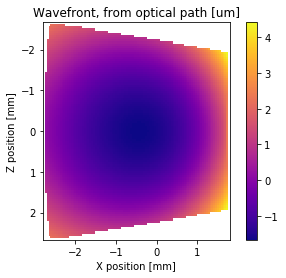

In [5]:
_ = display_wavefront(beam)